In [2]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import pickle
from sklearn.cluster import DBSCAN
df = pd.read_json('coviddata.json')
df

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
...,...,...,...,...
95,Judy,2020-07-04 16:35:30,13.176481,77.619396
96,Bob,2020-07-04 15:35:30,13.172339,77.662080
97,Grace,2020-07-04 23:35:30,13.115079,77.697991
98,Bob,2020-07-04 19:35:30,13.180751,77.704404


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ KB


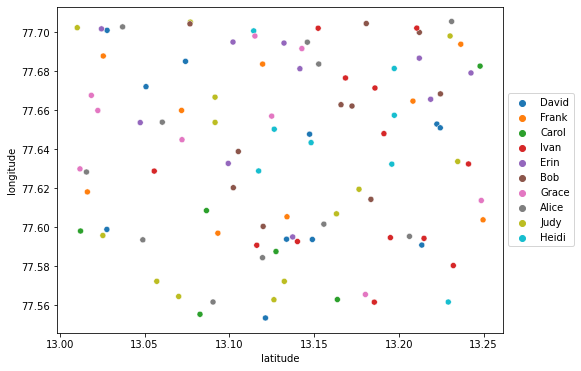

In [5]:
#analyse the latitudes and lognitudes using scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [6]:
#Creating a Model for Contact Tracing using DBSCAN Algorithm

def get_infected_names(input_name):
    dist = 0.0024384 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=dist, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    
    return infected_names



In [7]:
print(get_infected_names("Bob"))

['Ivan', 'Judy']


C:\Users\SAMUEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


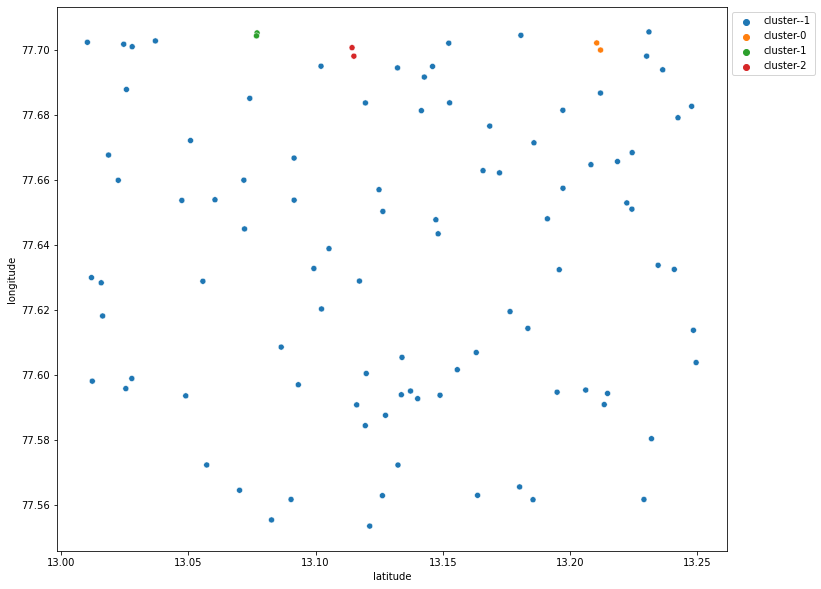

In [8]:
#generate clusters using the above model

epsilon =0.0024384 # a radial distance of 12 feet in kilometers
model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
labels = model.labels_
fig = plt.figure(figsize=(12,10))
la=df['latitude']
ln=df['longitude']
sns.scatterplot(la,ln,hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [16]:
#deployement of the model
dist = 0.0024384 # a radial distance of 12 feet in kilometers
model = DBSCAN(eps=dist, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
pickle.dump(model,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))